In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('../2~3.데이터 수집 및 전처리/머신러닝 전처리 데이터.CSV',encoding='EUC-KR')

In [75]:
data

,시군구,단지명,전용면적(㎡),계약년월,계약일,계약날짜,층,건축나이,거래건수,기준금리,법정동코드,지하철역수,거래금액(만원)
0,광주광역시 광산구 도산동,대덕1,59.3100,202303,18,2023-03-18,4,33,20,3.5,2920010200,1,9800
1,광주광역시 광산구 도산동,대주피오레1차,84.9800,202302,7,2023-02-07,2,23,14,3.5,2920010200,1,21000
2,광주광역시 광산구 도산동,대주피오레1차,84.9800,202305,31,2023-05-31,5,23,16,3.5,2920010200,1,22350
3,광주광역시 광산구 도산동,대주피오레2차,84.7575,202305,9,2023-05-09,5,22,16,3.5,2920010200,1,22400
4,광주광역시 광산구 도산동,대주피오레2차,84.7575,202305,13,2023-05-13,13,22,16,3.5,2920010200,1,22000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425074,광주광역시 서구 화정동,화정우미,115.1850,200611,10,2006-11-10,17,10,131,4.5,2914011900,1,19000
425075,광주광역시 서구 화정동,화정우미,84.8300,200611,27,2006-11-27,6,10,131,4.5,2914011900,1,12000
425076,광주광역시 서구 화정동,화정우미,59.8300,200611,30,2006-11-30,2,10,131,4.5,2914011900,1,7700
425077,광주광역시 서구 화정동,화정우미,84.8400,200612,6,2006-12-06,16,10,124,4.5,2914011900,1,12170


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install lightgbm

                                              0.0/1.3 MB ? eta -:--:--
     ----------                               0.3/1.3 MB 7.0 MB/s eta 0:00:01
     -----------------------------            1.0/1.3 MB 8.6 MB/s eta 0:00:01
     ---------------------------------------  1.3/1.3 MB 9.2 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 7.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install tqdm

                                              0.0/77.1 kB ? eta -:--:--
     ---------------------------------------- 77.1/77.1 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

from tqdm import tqdm
import re

In [89]:
data.head(2)

,시군구,단지명,전용면적(㎡),계약년월,계약일,계약날짜,층,건축나이,거래건수,기준금리,법정동코드,지하철역수,거래금액(만원)
0,광주광역시 광산구 도산동,대덕1,59.31,202303,18,2023-03-18,4,33,20,3.5,2920010200,1,9800
1,광주광역시 광산구 도산동,대주피오레1차,84.98,202302,7,2023-02-07,2,23,14,3.5,2920010200,1,21000


In [6]:
data['시군구']

0         광주광역시 광산구 도산동
1         광주광역시 광산구 도산동
2         광주광역시 광산구 도산동
3         광주광역시 광산구 도산동
4         광주광역시 광산구 도산동
              ...      
425074     광주광역시 서구 화정동
425075     광주광역시 서구 화정동
425076     광주광역시 서구 화정동
425077     광주광역시 서구 화정동
425078     광주광역시 서구 화정동
Name: 시군구, Length: 425079, dtype: object

In [134]:
X = data[['전용면적(㎡)', '계약년월','층', '건축나이','거래건수','기준금리','법정동코드']]
y = data['거래금액(만원)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# dacon 하이퍼파라미터튜닝 모델. 연습용
lrmodel = LinearRegression(n_jobs=-1)
ridge = Ridge(alpha=0.8, random_state=1)
lasso = Lasso(alpha = 0.01, random_state=1)
enet = ElasticNet(alpha=0.03, l1_ratio=0.01, random_state=1)
d_tree = DecisionTreeRegressor(max_depth=6, min_samples_split=10, min_samples_leaf=15, random_state=1)
rf = RandomForestRegressor(n_estimators=100,  max_depth=9, min_samples_split=50,
                           min_samples_leaf=5, random_state=1, n_jobs=-1)
model_xgb = xgb.XGBRegressor(n_estimators=100, max_depth=9, min_child_weight=5, gamma=0.1, n_jobs=-1 )
model_lgb = lgb.LGBMRegressor(n_estimators=100, max_depth=9, min_child_weight=5, n_jobs=-1,num_leaves=20)

In [5]:
# 특성없음
lrmodel = LinearRegression()
ridge = Ridge()
lasso = Lasso()
enet = ElasticNet()
d_tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
model_xgb = xgb.XGBRegressor()
model_lgb = lgb.LGBMRegressor()

In [8]:
def print_rmse_r2_score(model):
    # cv별 프린팅, 평균 저장
    model_name, rmse_list, r2_list = rmse_r2_cv(model)
    for i, (rmse, r2) in enumerate(zip(rmse_list, r2_list), start=1):
         print(f'{i} FOLDS: {model_name} RMSE: {rmse:.4f}, R2: {r2:.4f}')
    print(f'\n{model_name} mean RMSE: {np.mean(rmse_list):.4f}, mean R2: {np.mean(r2_list):.4f}')
    print('='*40)
    return model_name, np.mean(rmse_list), np.mean(r2_list)

def rmse_r2_cv(model):
    # cv별로 학습하는 함수
    tscv = TimeSeriesSplit(n_splits=10)
    rmse_list = []
    r2_list = []
    model_name = model.__class__.__name__
    for _, (train_index, test_index) in tqdm(enumerate(tscv.split(X), start=1), desc=f'{model_name} Cross Validations...', total=10):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = model.fit(X_train, y_train)
        pred = clf.predict(X_test)
        rmse = RMSE(y_test, pred)
        r2 = r2_score(y_test, pred)
        rmse_list.append(rmse)
        r2_list.append(r2)
    return model_name, rmse_list, r2_list

def RMSE(y, y_pred):
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse

In [17]:
models = []
rmse_scores = []
r2_scores = []
for model in [lrmodel, ridge, lasso, enet, d_tree, rf, model_xgb, model_lgb]:
    model_name, mean_rmse_score, mean_r2_score = print_rmse_r2_score(model)
    models.append(model_name)
    rmse_scores.append(mean_rmse_score)
    r2_scores.append(mean_r2_score)

LinearRegression Cross Validations...: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 20.85it/s]


1 FOLDS: LinearRegression RMSE: 10084.0162, R2: 0.6496
2 FOLDS: LinearRegression RMSE: 9080.6999, R2: 0.5288
3 FOLDS: LinearRegression RMSE: 6591.1190, R2: 0.6617
4 FOLDS: LinearRegression RMSE: 5906.4291, R2: 0.5981
5 FOLDS: LinearRegression RMSE: 5854.3037, R2: 0.4538
6 FOLDS: LinearRegression RMSE: 5383.9206, R2: 0.5477
7 FOLDS: LinearRegression RMSE: 5841.3210, R2: 0.5347
8 FOLDS: LinearRegression RMSE: 8988.2098, R2: -0.3882
9 FOLDS: LinearRegression RMSE: 4756.1851, R2: 0.2545
10 FOLDS: LinearRegression RMSE: 4739.9987, R2: 0.0180

LinearRegression mean RMSE: 6722.6203, mean R2: 0.3859


Ridge Cross Validations...: 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 32.96it/s]


1 FOLDS: Ridge RMSE: 10084.0369, R2: 0.6496
2 FOLDS: Ridge RMSE: 9080.6665, R2: 0.5288
3 FOLDS: Ridge RMSE: 6591.1186, R2: 0.6617
4 FOLDS: Ridge RMSE: 5906.4287, R2: 0.5981
5 FOLDS: Ridge RMSE: 5854.3037, R2: 0.4538
6 FOLDS: Ridge RMSE: 5383.9201, R2: 0.5478
7 FOLDS: Ridge RMSE: 5841.3208, R2: 0.5347
8 FOLDS: Ridge RMSE: 8988.2091, R2: -0.3882
9 FOLDS: Ridge RMSE: 4756.1838, R2: 0.2545
10 FOLDS: Ridge RMSE: 4739.9990, R2: 0.0180

Ridge mean RMSE: 6722.6187, mean R2: 0.3859


Lasso Cross Validations...: 100%|██████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.50it/s]


1 FOLDS: Lasso RMSE: 10085.3300, R2: 0.6495
2 FOLDS: Lasso RMSE: 9078.1201, R2: 0.5291
3 FOLDS: Lasso RMSE: 6590.9537, R2: 0.6618
4 FOLDS: Lasso RMSE: 5906.2105, R2: 0.5981
5 FOLDS: Lasso RMSE: 5854.5504, R2: 0.4537
6 FOLDS: Lasso RMSE: 5383.5709, R2: 0.5478
7 FOLDS: Lasso RMSE: 5841.1812, R2: 0.5348
8 FOLDS: Lasso RMSE: 8988.0814, R2: -0.3882
9 FOLDS: Lasso RMSE: 4754.0045, R2: 0.2551
10 FOLDS: Lasso RMSE: 4740.5592, R2: 0.0178

Lasso mean RMSE: 6722.2562, mean R2: 0.3859


ElasticNet Cross Validations...: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.00it/s]


1 FOLDS: ElasticNet RMSE: 10187.8392, R2: 0.6423
2 FOLDS: ElasticNet RMSE: 8660.3586, R2: 0.5714
3 FOLDS: ElasticNet RMSE: 6574.6227, R2: 0.6634
4 FOLDS: ElasticNet RMSE: 5887.6433, R2: 0.6007
5 FOLDS: ElasticNet RMSE: 5846.1615, R2: 0.4553
6 FOLDS: ElasticNet RMSE: 5350.0822, R2: 0.5534
7 FOLDS: ElasticNet RMSE: 5822.6967, R2: 0.5377
8 FOLDS: ElasticNet RMSE: 8951.1368, R2: -0.3768
9 FOLDS: ElasticNet RMSE: 4650.9873, R2: 0.2871
10 FOLDS: ElasticNet RMSE: 4763.4061, R2: 0.0083

ElasticNet mean RMSE: 6669.4935, mean R2: 0.3943


DecisionTreeRegressor Cross Validations...: 100%|██████████████████████████████████████| 10/10 [00:15<00:00,  1.53s/it]


1 FOLDS: DecisionTreeRegressor RMSE: 11924.6381, R2: 0.5100
2 FOLDS: DecisionTreeRegressor RMSE: 7105.4291, R2: 0.7115
3 FOLDS: DecisionTreeRegressor RMSE: 5878.3866, R2: 0.7309
4 FOLDS: DecisionTreeRegressor RMSE: 4808.9984, R2: 0.7336
5 FOLDS: DecisionTreeRegressor RMSE: 3732.3016, R2: 0.7780
6 FOLDS: DecisionTreeRegressor RMSE: 3359.9140, R2: 0.8239
7 FOLDS: DecisionTreeRegressor RMSE: 4628.5654, R2: 0.7079
8 FOLDS: DecisionTreeRegressor RMSE: 3816.0528, R2: 0.7498
9 FOLDS: DecisionTreeRegressor RMSE: 2632.1530, R2: 0.7717
10 FOLDS: DecisionTreeRegressor RMSE: 2414.2321, R2: 0.7452

DecisionTreeRegressor mean RMSE: 5030.0671, mean R2: 0.7262


RandomForestRegressor Cross Validations...: 100%|█████████████████████████████████████| 10/10 [21:10<00:00, 127.05s/it]


1 FOLDS: RandomForestRegressor RMSE: 7931.6618, R2: 0.7832
2 FOLDS: RandomForestRegressor RMSE: 5423.0674, R2: 0.8319
3 FOLDS: RandomForestRegressor RMSE: 4887.9955, R2: 0.8140
4 FOLDS: RandomForestRegressor RMSE: 3700.0011, R2: 0.8423
5 FOLDS: RandomForestRegressor RMSE: 2973.5829, R2: 0.8591
6 FOLDS: RandomForestRegressor RMSE: 2593.5523, R2: 0.8951
7 FOLDS: RandomForestRegressor RMSE: 3625.7346, R2: 0.8207
8 FOLDS: RandomForestRegressor RMSE: 3288.5715, R2: 0.8142
9 FOLDS: RandomForestRegressor RMSE: 1956.3370, R2: 0.8739
10 FOLDS: RandomForestRegressor RMSE: 1733.7020, R2: 0.8686

RandomForestRegressor mean RMSE: 3811.4206, mean R2: 0.8403


XGBRegressor Cross Validations...: 100%|███████████████████████████████████████████████| 10/10 [00:36<00:00,  3.65s/it]


1 FOLDS: XGBRegressor RMSE: 6539.0258, R2: 0.8527
2 FOLDS: XGBRegressor RMSE: 4717.6404, R2: 0.8728
3 FOLDS: XGBRegressor RMSE: 4358.4450, R2: 0.8521
4 FOLDS: XGBRegressor RMSE: 3444.6749, R2: 0.8633
5 FOLDS: XGBRegressor RMSE: 2780.2411, R2: 0.8768
6 FOLDS: XGBRegressor RMSE: 2651.7445, R2: 0.8903
7 FOLDS: XGBRegressor RMSE: 3251.0589, R2: 0.8559
8 FOLDS: XGBRegressor RMSE: 3385.2743, R2: 0.8031
9 FOLDS: XGBRegressor RMSE: 1750.6406, R2: 0.8990
10 FOLDS: XGBRegressor RMSE: 1635.4810, R2: 0.8831

XGBRegressor mean RMSE: 3451.4226, mean R2: 0.8649


LGBMRegressor Cross Validations...:   0%|                                                       | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data points in the train set: 38649, number of used features: 8
[LightGBM] [Info] Start training from score 26236.340293


LGBMRegressor Cross Validations...:  10%|████▋                                          | 1/10 [00:00<00:03,  2.74it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 77292, number of used features: 8
[LightGBM] [Info] Start training from score 26152.606453


LGBMRegressor Cross Validations...:  20%|█████████▍                                     | 2/10 [00:00<00:02,  3.03it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 115935, number of used features: 8
[LightGBM] [Info] Start training from score 24629.378074


LGBMRegressor Cross Validations...:  30%|██████████████                                 | 3/10 [00:01<00:02,  2.81it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 154578, number of used features: 8
[LightGBM] [Info] Start training from score 23566.597899


LGBMRegressor Cross Validations...:  40%|██████████████████▊                            | 4/10 [00:01<00:02,  2.46it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 717
[LightGBM] [Info] Number of data points in the train set: 193221, number of used features: 8
[LightGBM] [Info] Start training from score 22362.432696


LGBMRegressor Cross Validations...:  50%|███████████████████████▌                       | 5/10 [00:02<00:02,  2.06it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 736
[LightGBM] [Info] Number of data points in the train set: 231864, number of used features: 8
[LightGBM] [Info] Start training from score 21205.027689


LGBMRegressor Cross Validations...:  60%|████████████████████████████▏                  | 6/10 [00:02<00:02,  1.89it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 766
[LightGBM] [Info] Number of data points in the train set: 270507, number of used features: 8
[LightGBM] [Info] Start training from score 20255.548045


LGBMRegressor Cross Validations...:  70%|████████████████████████████████▉              | 7/10 [00:03<00:01,  1.70it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 789
[LightGBM] [Info] Number of data points in the train set: 309150, number of used features: 8
[LightGBM] [Info] Start training from score 19362.939107


LGBMRegressor Cross Validations...:  80%|█████████████████████████████████████▌         | 8/10 [00:04<00:01,  1.54it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 347793, number of used features: 8
[LightGBM] [Info] Start training from score 18529.221065


LGBMRegressor Cross Validations...:  90%|██████████████████████████████████████████▎    | 9/10 [00:05<00:00,  1.37it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 876
[LightGBM] [Info] Number of data points in the train set: 386436, number of used features: 8
[LightGBM] [Info] Start training from score 17601.731094


LGBMRegressor Cross Validations...: 100%|██████████████████████████████████████████████| 10/10 [00:06<00:00,  1.64it/s]

1 FOLDS: LGBMRegressor RMSE: 6428.6204, R2: 0.8576
2 FOLDS: LGBMRegressor RMSE: 5057.1179, R2: 0.8539
3 FOLDS: LGBMRegressor RMSE: 4376.2995, R2: 0.8509
4 FOLDS: LGBMRegressor RMSE: 3770.0855, R2: 0.8363
5 FOLDS: LGBMRegressor RMSE: 2823.3683, R2: 0.8730
6 FOLDS: LGBMRegressor RMSE: 2868.6785, R2: 0.8716
7 FOLDS: LGBMRegressor RMSE: 3449.6457, R2: 0.8377
8 FOLDS: LGBMRegressor RMSE: 3299.9331, R2: 0.8129
9 FOLDS: LGBMRegressor RMSE: 1906.4965, R2: 0.8802
10 FOLDS: LGBMRegressor RMSE: 1851.5836, R2: 0.8502

LGBMRegressor mean RMSE: 3583.1829, mean R2: 0.8524


In [101]:
result_df = pd.DataFrame({'Model': models, 'RMSE': rmse_scores, 'R2': r2_scores}).reset_index(drop=True)
result_df

,Model,RMSE,R2
0,LinearRegression,6722.620306,0.385872
1,Ridge,6722.618718,0.385872
2,Lasso,6722.256191,0.385947
3,ElasticNet,6669.493452,0.394279
4,DecisionTreeRegressor,5030.067124,0.726242
5,RandomForestRegressor,3811.420617,0.840293
6,XGBRegressor,3451.422637,0.864900
7,LGBMRegressor,3583.182899,0.852412


In [ ]:
lrmodel = LinearRegression(n_jobs=-1)
ridge = Ridge(alpha=0.8, random_state=1)
lasso = Lasso(alpha = 0.01, random_state=1)
enet = ElasticNet(alpha=0.03, l1_ratio=0.01, random_state=1)
d_tree = DecisionTreeRegressor(max_depth=6, min_samples_split=10, min_samples_leaf=15, random_state=1)
rf = RandomForestRegressor(n_estimators=100,  max_depth=9, min_samples_split=50,
                           min_samples_leaf=5, random_state=1, n_jobs=-1)
model_xgb = xgb.XGBRegressor(n_estimators=100, max_depth=9, min_child_weight=5, gamma=0.1, n_jobs=-1 )
model_lgb = lgb.LGBMRegressor(n_estimators=100, max_depth=9, min_child_weight=5, n_jobs=-1,num_leaves=20)

##  하이퍼 파라미터 튜닝

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
# Linear Regression
lr_params = {
    'fit_intercept': [True, False]
}
lr_grid_search = GridSearchCV(estimator=LinearRegression(n_jobs=-1),
                              param_grid=lr_params,
                              scoring='neg_mean_squared_error',
                              cv=10,
                              n_jobs=-1)
lr_grid_search.fit(X, y)
best_lr_model = lr_grid_search.best_estimator_

In [24]:


# Ridge
ridge_params = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}
ridge_grid_search = GridSearchCV(estimator=Ridge(random_state=1),
                                 param_grid=ridge_params,
                                 scoring='neg_mean_squared_error',
                                 cv=10,
                                 n_jobs=-1)
ridge_grid_search.fit(X, y)
best_ridge_model = ridge_grid_search.best_estimator_

In [25]:
# Lasso
lasso_params = {
    'alpha': [0.001, 0.01, 0.1, 1.0]
}
lasso_grid_search = GridSearchCV(estimator=Lasso(random_state=1),
                                 param_grid=lasso_params,
                                 scoring='neg_mean_squared_error',
                                 cv=10,
                                 n_jobs=-1)
lasso_grid_search.fit(X, y)
best_lasso_model = lasso_grid_search.best_estimator_

In [26]:
# ElasticNet
enet_params = {
    'alpha': [0.001, 0.01, 0.1, 1.0],
    'l1_ratio': [0.01, 0.1, 0.5, 0.9]
}
enet_grid_search = GridSearchCV(estimator=ElasticNet(random_state=1),
                                param_grid=enet_params,
                                scoring='neg_mean_squared_error',
                                cv=10,
                                n_jobs=-1)
enet_grid_search.fit(X, y)
best_enet_model = enet_grid_search.best_estimator_

In [12]:
# Decision Tree
d_tree_params = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}
d_tree_grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=1),
                                  param_grid=d_tree_params,
                                  scoring='neg_mean_squared_error',
                                  cv=10,
                                  n_jobs=-1)
d_tree_grid_search.fit(X, y)
best_d_tree_model = d_tree_grid_search.best_estimator_

In [16]:
# RandomForest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=1, n_jobs=-1),
                              param_grid=rf_params,
                              scoring='neg_mean_squared_error',
                              cv=10,
                              n_jobs=-1)
rf_grid_search.fit(X, y)
best_rf_model = rf_grid_search.best_estimator_


KeyboardInterrupt: 

In [54]:
xgb_params = {
    'n_estimators': [100],
    'max_depth': [ 10, 15],
    'min_child_weight': [1, 3, 5],
    'gamma': [0.1, 0.3]
}

# 진행 상황 표시 준비
total_combinations = len(xgb_params['n_estimators']) * len(xgb_params['max_depth']) * len(xgb_params['min_child_weight']) * len(xgb_params['gamma'])
progress_bar = tqdm(total=total_combinations, desc="Grid Search Progress")

xgb_grid_search = GridSearchCV(estimator=xgb.XGBRegressor(n_jobs=-1),
                               param_grid=xgb_params,
                               scoring='neg_mean_squared_error',
                               cv=10,
                               n_jobs=-1)

xgb_grid_search.fit(X, y)

best_xgb_model = xgb_grid_search.best_estimator_

Grid Search Progress:   0%|                                                                     | 0/12 [00:18<?, ?it/s]


KeyboardInterrupt: 

In [14]:

# LightGBM
lgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_child_weight': [1, 3, 5],
    'num_leaves': [10, 20, 30]
}
lgb_grid_search = GridSearchCV(estimator=lgb.LGBMRegressor(n_jobs=-1),
                               param_grid=lgb_params,
                               scoring='neg_mean_squared_error',
                               cv=10,
                               n_jobs=-1)
lgb_grid_search.fit(X, y)
best_lgb_model = lgb_grid_search.best_estimator_



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 425079, number of used features: 8
[LightGBM] [Info] Start training from score 16811.097775


In [27]:
# 출력
print("Best Linear Regression Model:", best_lr_model)
print("Best Ridge Model:", best_ridge_model)
print("Best Lasso Model:", best_lasso_model)
print("Best ElasticNet Model:", best_enet_model)


Best Linear Regression Model: LinearRegression(n_jobs=-1)
Best Ridge Model: Ridge(alpha=2.0, random_state=1)
Best Lasso Model: Lasso(alpha=0.001, random_state=1)
Best ElasticNet Model: ElasticNet(alpha=0.01, l1_ratio=0.1, random_state=1)


In [15]:
# 출력
print("Best Linear Regression Model:", best_lr_model)
print("Best Ridge Model:", best_ridge_model)
print("Best Lasso Model:", best_lasso_model)
print("Best ElasticNet Model:", best_enet_model)
print("Best Decision Tree Model:", best_d_tree_model)
# print("Best RandomForest Model:", best_rf_model)
# print("Best XGBoost Model:", best_xgb_model)
print("Best LightGBM Model:", best_lgb_model)

Best Linear Regression Model: LinearRegression(n_jobs=-1)
Best Ridge Model: Ridge(alpha=2.0, random_state=1)
Best Lasso Model: Lasso(alpha=0.001, random_state=1)
Best ElasticNet Model: ElasticNet(alpha=0.1, random_state=1)
Best Decision Tree Model: DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=1)
Best LightGBM Model: LGBMRegressor(max_depth=10, min_child_weight=1, n_estimators=200, n_jobs=-1,
              num_leaves=30)


In [56]:
best_rf_model=RandomForestRegressor(max_depth=10,min_samples_split=10,n_estimators=50,n_jobs=-1,random_state=1)
print("Best RandomForest Model:", best_rf_model)

Best RandomForest Model: RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=50,
                      n_jobs=-1, random_state=1)


In [61]:
best_xgb_model= xgb.XGBRegressor(max_depth=5,min_child_weight=5,n_estimators=200,n_jobs=-1,num_leaves=20)
print("Best XGBoost Model:", best_xgb_model)

Best XGBoost Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=-1, num_leaves=20, num_parallel_tree=None,
             predictor=None, ...)


In [125]:
lrmodel = LinearRegression(n_jobs=-1)
ridge = Ridge(alpha=2.0, random_state=1)
lasso = Lasso(alpha=0.001, random_state=1)
enet = ElasticNet(alpha=0.1, random_state=1)
d_tree = DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=1)
rf = RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=1)
model_xgb = xgb.XGBRegressor(max_depth=5,min_child_weight=5,n_estimators=200,n_jobs=-1)
model_lgb = lgb.LGBMRegressor(max_depth=10, min_child_weight=1, n_estimators=200, n_jobs=-1, num_leaves=30)

In [126]:
models2 = []
rmse_scores2 = []
r2_scores2 = []
for model in [lrmodel]:#, ridge, lasso, enet, d_tree, rf, model_xgb,model_lgb
    model_name, mean_rmse_score, mean_r2_score = print_rmse_r2_score(model)
    models2.append(model_name)
    rmse_scores2.append(mean_rmse_score)
    r2_scores2.append(mean_r2_score)

LinearRegression Cross Validations...: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 24.20it/s]

1 FOLDS: LinearRegression RMSE: 2600.6902, R2: 0.7714
2 FOLDS: LinearRegression RMSE: 3997.1531, R2: 0.7118
3 FOLDS: LinearRegression RMSE: 4147.8435, R2: 0.7663
4 FOLDS: LinearRegression RMSE: 3779.1529, R2: 0.7827
5 FOLDS: LinearRegression RMSE: 3336.7809, R2: 0.8199
6 FOLDS: LinearRegression RMSE: 4912.5631, R2: 0.7387
7 FOLDS: LinearRegression RMSE: 6012.8537, R2: 0.7061
8 FOLDS: LinearRegression RMSE: 8545.3657, R2: 0.5708
9 FOLDS: LinearRegression RMSE: 11637.5670, R2: 0.5178
10 FOLDS: LinearRegression RMSE: 13159.5142, R2: 0.5195

LinearRegression mean RMSE: 6212.9484, mean R2: 0.6905


In [102]:
[]
result_df2 = pd.DataFrame({'Model': models2, 'RMSE': rmse_scores2, 'R2': r2_scores2}).reset_index(drop=True)
result_df2

,Model,RMSE,R2
0,LinearRegression,6722.620306,0.385872
1,Ridge,6722.617130,0.385872
2,Lasso,6722.619938,0.385872
3,ElasticNet,6711.312508,0.387669
4,DecisionTreeRegressor,4865.563269,0.734787
5,RandomForestRegressor,4396.977604,0.779326
6,XGBRegressor,3451.422637,0.864900
7,LGBMRegressor,3362.155445,0.871926


In [118]:
result_df2 = pd.DataFrame({'Model': models2, 'RMSE': rmse_scores2, 'R2': r2_scores2}).reset_index(drop=True)
result_df2

,Model,RMSE,R2
0,LinearRegression,6210.890915,0.691028
1,Ridge,6210.892428,0.691028
2,Lasso,6210.891900,0.691028
3,ElasticNet,6213.060648,0.690734
4,DecisionTreeRegressor,5091.449500,0.783837
5,RandomForestRegressor,4758.071758,0.812124
6,XGBRegressor,3726.838301,0.880428
7,LGBMRegressor,3875.671421,0.872812


In [14]:
X_predict = [[84, 202405,10,10 ,15,3.5,2915511500]]
X_predict_df= pd.DataFrame(X_predict,columns=['전용면적(㎡)', '계약년월','층', '건축나이','거래건수','기준금리','법정동코드'])

In [15]:
print(f"LinearRegression: {lrmodel.predict(X_predict_df)[0]}")
print(f"Ridge: {ridge.predict(X_predict_df)[0]}")
print(f"Lasso: {lasso.predict(X_predict_df)[0]}")
print(f"ElasticNet: {enet.predict(X_predict_df)[0]}")
print(f"DecisionTreeRegressor: {d_tree.predict(X_predict_df)[0]}")
print(f"RandomForestRegressor: {rf.predict(X_predict_df)[0]}")
print(f"XGBRegressor: {model_xgb.predict(X_predict_df)[0]}")
print(f"LGBMRegressor :{model_lgb.predict(X_predict_df)[0]}")

LinearRegression: 38362.016798700206
Ridge: 38362.00167691568
Lasso: 38362.008204900194
ElasticNet: 38229.46744932374
DecisionTreeRegressor: 34976.229508196724
RandomForestRegressor: 32708.578926516497
XGBRegressor: 41901.55859375
LGBMRegressor :44115.07771544055


In [46]:
X_predict = [[84, 202307,10,10 ,15,3.5,2955511500]]
X_predict_df= pd.DataFrame(X_predict,columns=['전용면적(㎡)', '계약년월','층', '건축나이','거래건수','기준금리','법정동코드'])
print(f"LinearRegression: {lrmodel.predict(X_predict_df)[0]}")
print(f"Ridge: {ridge.predict(X_predict_df)[0]}")
print(f"Lasso: {lasso.predict(X_predict_df)[0]}")
print(f"ElasticNet: {enet.predict(X_predict_df)[0]}")
print(f"DecisionTreeRegressor: {d_tree.predict(X_predict_df)[0]}")
print(f"RandomForestRegressor: {rf.predict(X_predict_df)[0]}")
print(f"XGBRegressor: {model_xgb.predict(X_predict_df)[0]}")
print(f"LGBMRegressor :{model_lgb.predict(X_predict_df)[0]}")

LinearRegression: 22522.49380542105
Ridge: 22522.479038583115
Lasso: 22522.485077644233
ElasticNet: 22393.86655559577
DecisionTreeRegressor: 34976.229508196724
RandomForestRegressor: 35135.90598276835
XGBRegressor: 32523.26953125
LGBMRegressor :33669.41197366561


In [122]:
X_predict5 = [[84.36, 202307,4,10 ,15,3.5,2920011600]]
lrmodel.predict(X_predict5)

C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34884.86934013])

# 2023년 7월 데이터 사용!

In [127]:
seventh_data= pd.read_csv('../2~3.데이터 수집 및 전처리/7월 테스트 데이터.csv',encoding="EUC-KR")

In [128]:
seventh_data=seventh_data.sort_values(by=['계약날짜'])

In [133]:
X_predict3 = seventh_data[['전용면적(㎡)','계약년월','층','건축나이','거래건수','기준금리','법정동코드']]
y_predict3 = seventh_data['거래금액(만원)']

In [131]:
seventh_data['예측 금액']=lrmodel.predict(X_predict3)
# seventh_data['예측 금액2']= ridge.predict(X_predict3)
# seventh_data['예측 금액3']=lasso.predict(X_predict3)
# seventh_data['예측 금액4']=enet.predict(X_predict3)

In [132]:
rmse2 = mean_squared_error(y_predict3, seventh_data['예측 금액'], squared=False)
r2_2 = r2_score(y_predict3, seventh_data['예측 금액'])

print(f'RMSE: {rmse2:.4f}')
print(f'R2 Score: {r2_2:.4f}')

RMSE: 13984.8554
R2 Score: 0.5185


In [111]:
rmse2 = mean_squared_error(y_predict3, seventh_data['예측 금액2'], squared=False)
r2_2 = r2_score(y_predict3, seventh_data['예측 금액2'])

print(f'RMSE: {rmse2:.4f}')
print(f'R2 Score: {r2_2:.4f}')

RMSE: 13991.4156
R2 Score: 0.5180


In [112]:
rmse3 = mean_squared_error(y_predict3, seventh_data['예측 금액3'], squared=False)
r2_3 = r2_score(y_predict3, seventh_data['예측 금액3'])

print(f'RMSE: {rmse3:.4f}')
print(f'R2 Score: {r2_3:.4f}')

RMSE: 13991.4150
R2 Score: 0.5180


In [113]:
rmse4 = mean_squared_error(y_predict3, seventh_data['예측 금액4'], squared=False)
r2_4 = r2_score(y_predict3, seventh_data['예측 금액4'])

print(f'RMSE: {rmse4:.4f}')
print(f'R2 Score: {r2_4:.4f}')

RMSE: 14003.3472
R2 Score: 0.5172


In [114]:
model_t=['linear','Ridge','Lasso',"ElasticNet" ]
rmse_t=[rmse1,rmse2,rmse3,rmse4]
r2_t=[r2_1,r2_2,r2_3,r2_4]

pd.DataFrame({'Model': model_t, 'RMSE': rmse_t, 'R2': r2_t})

,Model,RMSE,R2
0,linear,13991.414289,0.518010
1,Ridge,13991.415580,0.518010
2,Lasso,13991.415013,0.518010
3,ElasticNet,14003.347200,0.517188


In [47]:
seventh_data

,시군구,단지명,전용면적(㎡),계약년월,계약일,계약날짜,층,건축나이,거래건수,기준금리,법정동코드,지하철역수,거래금액(만원),예측 금액
572,광주광역시 북구 각화동,각화골드클래스,84.9701,202307,1,2023-07-01,6,6,25,3.5,2917011300,0,"36,800",38228.174557
65,광주광역시 광산구 소촌동,모아드림타운1차,36.3544,202307,1,2023-07-01,7,23,17,3.5,2920010800,0,"8,300",16995.655466
397,광주광역시 남구 봉선동,주월동이지더원3단지,84.9381,202307,1,2023-07-01,4,11,39,3.5,2915511500,0,"39,000",36104.611927
122,광주광역시 광산구 신가동,수완지구호반베르디움1차,84.8840,202307,1,2023-07-01,10,11,35,3.5,2920011900,0,"65,000",34886.252052
400,광주광역시 남구 봉선동,포스코더샵,59.8900,202307,1,2023-07-01,10,19,39,3.5,2915511500,0,"38,000",26455.375712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,광주광역시 북구 각화동,힐스테이트각화,84.9442,202307,31,2023-07-31,13,5,25,3.5,2917011300,0,"45,500",39185.943739
89,광주광역시 광산구 송정동,마이다스빌,50.5100,202307,31,2023-07-31,1,24,17,3.5,2920010100,2,"8,850",19511.234461
204,광주광역시 광산구 쌍암동,힐스테이트리버파크,84.9500,202307,31,2023-07-31,10,4,15,3.5,2920011600,0,"63,200",38429.155826
1103,광주광역시 서구 풍암동,현대,59.9500,202307,31,2023-07-31,4,23,26,3.5,2914012800,0,"15,400",24618.156496


In [48]:
seventh_data.to_csv('선형회귀로 예측한 2023년 7월 데이터 결과.csv',encoding= "EUC-KR")

In [62]:
pre_data=[]

['전용면적(㎡)','계약년월','층','건축나이','거래건수','기준금리','법정동코드']
for i in  (202307,202308,202309,202312,202406,202506,202606):
    for j in data['법정명코드'].unique():
        X_predata=[[84,i,10,10,20,3.5,j]]
        result=lrmodel.predict(X_predata)
        pre_data.append(result)

IndentationError: expected an indented block (1290263423.py, line 6)

In [53]:
pre_data

[array([35189.71190473]),
 array([35205.63554172]),
 array([35221.55917871]),
 array([35269.33008968]),
 array([36766.15196685]),
 array([38358.51566597]),
 array([39950.87936508])]

In [57]:
result_data=pd.DataFrame(pre_data, columns)

In [60]:
result_data=result_data.T

In [61]:
result_data

,0,1,2,3,4,5,6
0,35189.711905,35205.635542,35221.559179,35269.33009,36766.151967,38358.515666,39950.879365


In [68]:
prediction_periods = [202307, 202308, 202309, 202312, 202406, 202506, 202606]

# 예측 결과를 저장할 데이터프레임 생성
predictions = pd.DataFrame(columns=prediction_periods, index=data['법정동코드'].unique())

# 주어진 특성에 대한 전처리 필요

for period in prediction_periods:
    for code in data['법정동코드'].unique():
        X_predata = [[84, period, 10, 10, 20, 3.5, code]]
        result = lrmodel.predict(X_predata)
        predictions.loc[code, period] = result

# 데이터프레임 확인
predictions= predictions.round(2)

C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.w

In [70]:
predictions.to_csv('각 연도별예측결과값.csv',encoding='EUC-KR')

In [115]:
import pickle

In [117]:
with open('linear.pkl', 'wb') as model_file:
    pickle.dump(lrmodel, model_file)

7월 데이터 시각화

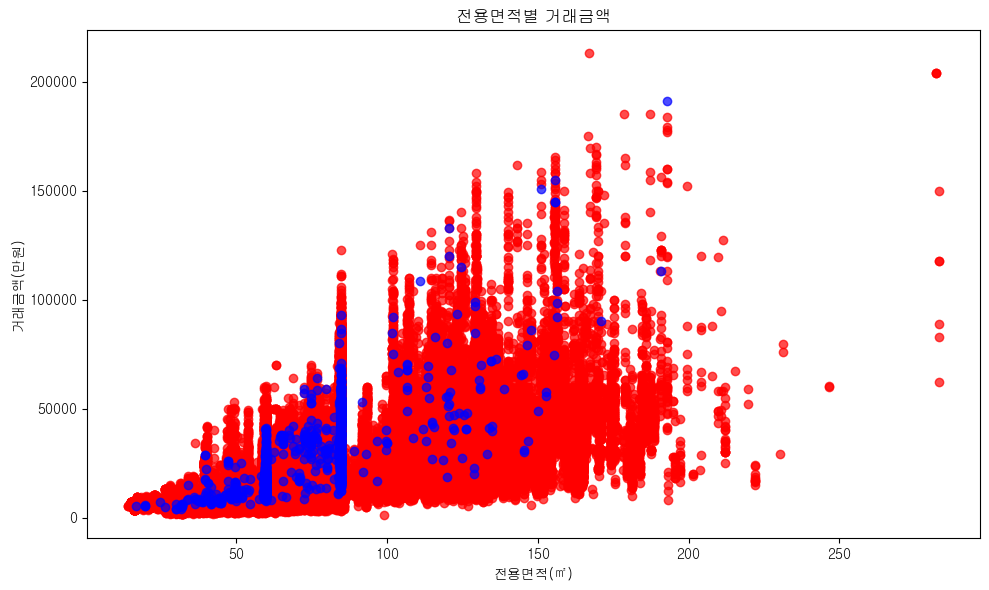

In [138]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = r'C:\Windows\Fonts\gulim.ttf'
plt.rc('font', family='Gulim')

plt.figure(figsize=(10, 6))  # 그래프의 크기 조절 (선택사항)
plt.scatter(data['전용면적(㎡)'], data['거래금액(만원)'], color='red', alpha=0.7) 
plt.scatter(seventh_data['전용면적(㎡)'], seventh_data['거래금액(만원)'], color='blue', alpha=0.7)  # 산점도 그리기
plt.xlabel('전용면적(㎡)')  # x축 레이블
plt.ylabel('거래금액(만원)')  # y축 레이블
plt.title('전용면적별 거래금액')  # 그래프 제목
plt.xticks()  # x축 레이블 회전 (선택사항)
plt.tight_layout()  # 그래프 간격 조절 (선택사항)
plt.show()


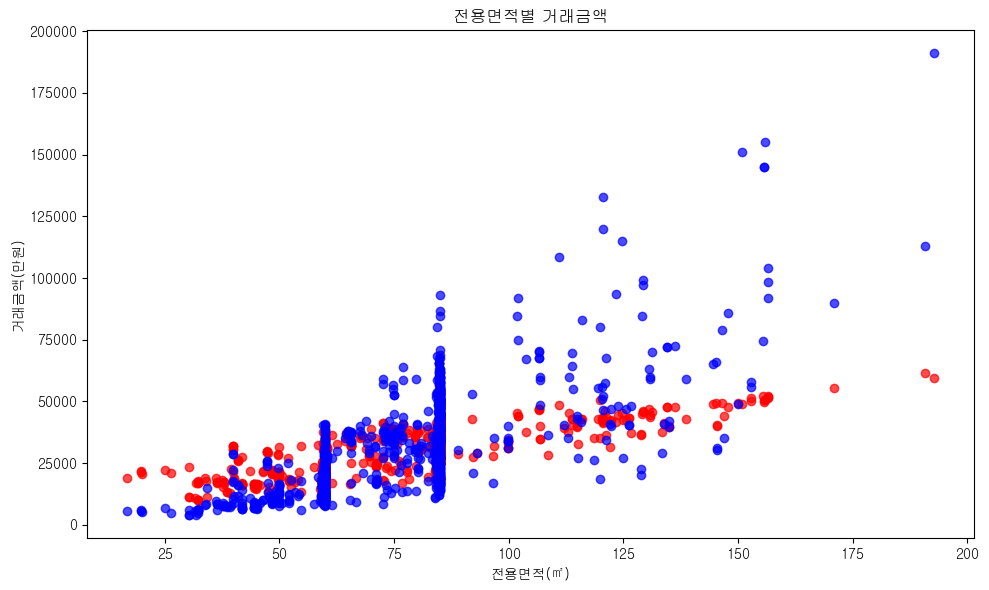

In [140]:
plt.figure(figsize=(10, 6))  # 그래프의 크기 조절 (선택사항)
plt.scatter(seventh_data['전용면적(㎡)'], seventh_data['예측 금액'], color='red', alpha=0.7)
plt.scatter(seventh_data['전용면적(㎡)'], seventh_data['거래금액(만원)'], color='blue', alpha=0.7)  # 산점도 그리기
plt.xlabel('전용면적(㎡)')  # x축 레이블
plt.ylabel('거래금액(만원)')  # y축 레이블
plt.title('전용면적별 거래금액')  # 그래프 제목
plt.xticks()  # x축 레이블 회전 (선택사항)
plt.tight_layout()  # 그래프 간격 조절 (선택사항)
plt.show()
ㅠ

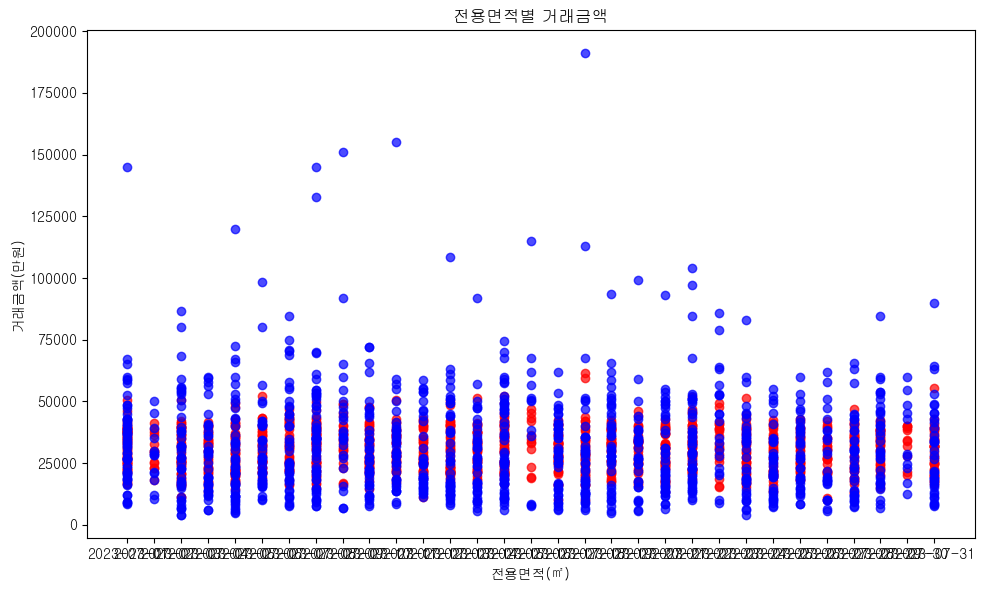

In [141]:
plt.figure(figsize=(10, 6))  # 그래프의 크기 조절 (선택사항)
plt.scatter(seventh_data[''], seventh_data['예측 금액'], color='red', alpha=0.7)
plt.scatter(seventh_data['계약날짜'], seventh_data['거래금액(만원)'], color='blue', alpha=0.7)  # 산점도 그리기
plt.xlabel('전용면적(㎡)')  # x축 레이블
plt.ylabel('거래금액(만원)')  # y축 레이블
plt.title('전용면적별 거래금액')  # 그래프 제목
plt.xticks()  # x축 레이블 회전 (선택사항)
plt.tight_layout()  # 그래프 간격 조절 (선택사항)
plt.show()
